<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN vs. K-Means

_Author: Katie Sylvia_
 
 In **Unsupervised Learning** we have different type of algorithms such as:
 
1. Clustering
2. PCA
2. Association Rules
3. Recommendation Engines


In **Clustering** we have talked about:
1. K-Means Clustering
2. DBSCAN Clustering

In this notebook, we will mainly discuss *DBSCAN Clustering*

As you recall from yesterday, there are some disadvantages in K-Means Clustering. Among them are that K-Means is sensitive to outliers and does not perform well with non-spherical shapes of clusters.
   
   To deal with this we have *Density Based Spatial Clustering (DBSCAN)*:
   
     - It is mainly used to find outliers and to deal with non-spherical data
     - Clustering is mainly done based on density of data points (where more number of data points are present).


In [1]:
# Something new to install...
#! pip install plotly

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Something new to import...
import plotly.express as px

# Imports from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans

# Setting formatting of floats to be five places past the decimal
pd.options.display.float_format = '{:.5f}'.format

In [3]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [4]:
import mkl
mkl.set_num_threads(1)

1

In [5]:
import warnings
warnings.filterwarnings('ignore')

### I. Get Data Ready

In [6]:
# From Plotly, we'll import the Gapminder data
df = px.data.gapminder()

In [7]:
# Head
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.80100,8425333,779.44531,AFG,4
1,Afghanistan,Asia,1957,30.33200,9240934,820.85303,AFG,4
2,Afghanistan,Asia,1962,31.99700,10267083,853.10071,AFG,4
3,Afghanistan,Asia,1967,34.02000,11537966,836.19714,AFG,4
4,Afghanistan,Asia,1972,36.08800,13079460,739.98111,AFG,4


In [8]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [9]:
# Nulls
df.isnull().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
iso_alpha    0
iso_num      0
dtype: int64

In [10]:
df.describe()

,year,lifeExp,pop,gdpPercap,iso_num
count,1704.00000,1704.00000,1704.00000,1704.00000,1704.00000
mean,1979.50000,59.47444,29601212.32453,7215.32708,425.88028
std,17.26533,12.91711,106157896.74391,9857.45454,248.30571
min,1952.00000,23.59900,60011.00000,241.16588,4.00000
25%,1965.75000,48.19800,2793664.00000,1202.06031,208.00000
50%,1979.50000,60.71250,7023595.50000,3531.84699,410.00000
75%,1993.25000,70.84550,19585221.75000,9325.46235,638.00000
max,2007.00000,82.60300,1318683096.00000,113523.13290,894.00000


In [11]:
# Filter Data to Most Recent Year
df = df[df["year"] == 2007]

In [12]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.82800,31889923,974.58034,AFG,4
23,Albania,Europe,2007,76.42300,3600523,5937.02953,ALB,8
35,Algeria,Africa,2007,72.30100,33333216,6223.36747,DZA,12
47,Angola,Africa,2007,42.73100,12420476,4797.23127,AGO,24
59,Argentina,Americas,2007,75.32000,40301927,12779.37964,ARG,32


In [13]:
# Set Country to Index
df = df.set_index("country")

In [14]:
# Drop `iso_alpha`, `year`, and `iso_num`
df = df.drop(columns= ["iso_alpha", "year","iso_num"])

In [15]:
df.head()

,continent,lifeExp,pop,gdpPercap
country,,,,
Afghanistan,Asia,43.82800,31889923,974.58034
Albania,Europe,76.42300,3600523,5937.02953
Algeria,Africa,72.30100,33333216,6223.36747
Angola,Africa,42.73100,12420476,4797.23127
Argentina,Americas,75.32000,40301927,12779.37964


In [16]:
# How many countries in each continent?
df.groupby("continent").count()

,lifeExp,pop,gdpPercap
continent,,,
Africa,52,52,52
Americas,25,25,25
Asia,33,33,33
Europe,30,30,30
Oceania,2,2,2


In [17]:
# Get dummies!
df = pd.get_dummies(df, columns = ["continent"], drop_first=True)
# Drop first (Africa) to avoid multicollinearity

In [18]:
# Head (again!)
df.head()


,lifeExp,pop,gdpPercap,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
country,,,,,,,
Afghanistan,43.82800,31889923,974.58034,0,1,0,0
Albania,76.42300,3600523,5937.02953,0,0,1,0
Algeria,72.30100,33333216,6223.36747,0,0,0,0
Angola,42.73100,12420476,4797.23127,0,0,0,0
Argentina,75.32000,40301927,12779.37964,1,0,0,0


In [19]:
# Define X

X = df[df.columns]

In [20]:
#X

In [21]:
# Scale Features
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### II. K-Means Clustering Model

In [22]:
# Elbow Plot

inertia_list = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_sc)
    inertia_list.append(kmeans.inertia_)
    
inertia_list

[994.0000000000001,
 745.3298363925305,
 574.4502741562053,
 411.73669924060437,
 265.0727010035231,
 145.1814036102372,
 107.71312813400928,
 85.04751469619288,
 64.21503964722274,
 51.117630191621906,
 44.427393449311325,
 39.61391638043153,
 34.973293627279205,
 32.18893032504023,
 29.39397640679738,
 27.60106783104939,
 24.865355230010056,
 22.942367801815198,
 20.67935810943256,
 18.79931213638287]

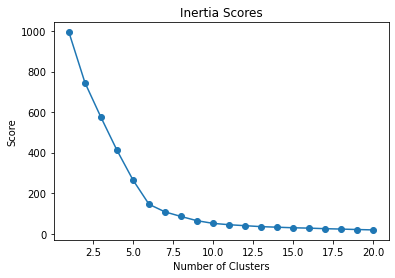

In [23]:
plt.plot(range(1,21), inertia_list, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Inertia Scores");

# Inertia --> lower is better but that does not mean we should
#             score chase so three clusters works out well here. 

In [24]:
# Silhouette Score

silhouette_list = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_sc)
    silhouette_list.append(silhouette_score(X_sc,kmeans.labels_))
    
silhouette_list

[0.37364650802336946,
 0.4487356234240466,
 0.5626593043305045,
 0.6010799129127454,
 0.6350842772929556,
 0.639081463196919,
 0.593693718907387,
 0.5983706823621519,
 0.6055705819165501,
 0.570938799570904,
 0.532980577767962,
 0.5348277074522618,
 0.4736381214379417,
 0.5396841376422912,
 0.4649067649969708,
 0.4787488409441888,
 0.4928460815925534,
 0.4960829914836251,
 0.4717557647961839]

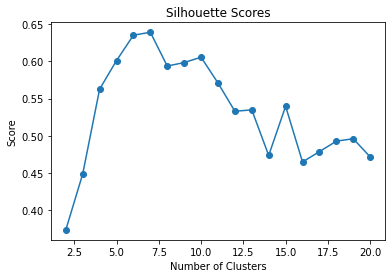

In [25]:
plt.plot(range(2,21),silhouette_list, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Silhouette Scores");

#### Based off of our metrics above, which k should we try first?

Answer Here: 6 clusters seem to be the best.
We can also try 7 clusters.

In [26]:
# Now let's try it!
km = KMeans(n_clusters=6, random_state=42)

# Instantiate & Fit
km.fit(X_sc)

KMeans(n_clusters=6, random_state=42)

In [27]:
# Silhouette Score
silhouette_score(X_sc,km.labels_)

0.6350842772929556

#### Visualize Your Clusters!

In [28]:
# Add cluster column
df['cluster'] = km.labels_
df.head()

,lifeExp,pop,gdpPercap,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,cluster
country,,,,,,,,
Afghanistan,43.82800,31889923,974.58034,0,1,0,0,3
Albania,76.42300,3600523,5937.02953,0,0,1,0,1
Algeria,72.30100,33333216,6223.36747,0,0,0,0,4
Angola,42.73100,12420476,4797.23127,0,0,0,0,4
Argentina,75.32000,40301927,12779.37964,1,0,0,0,0


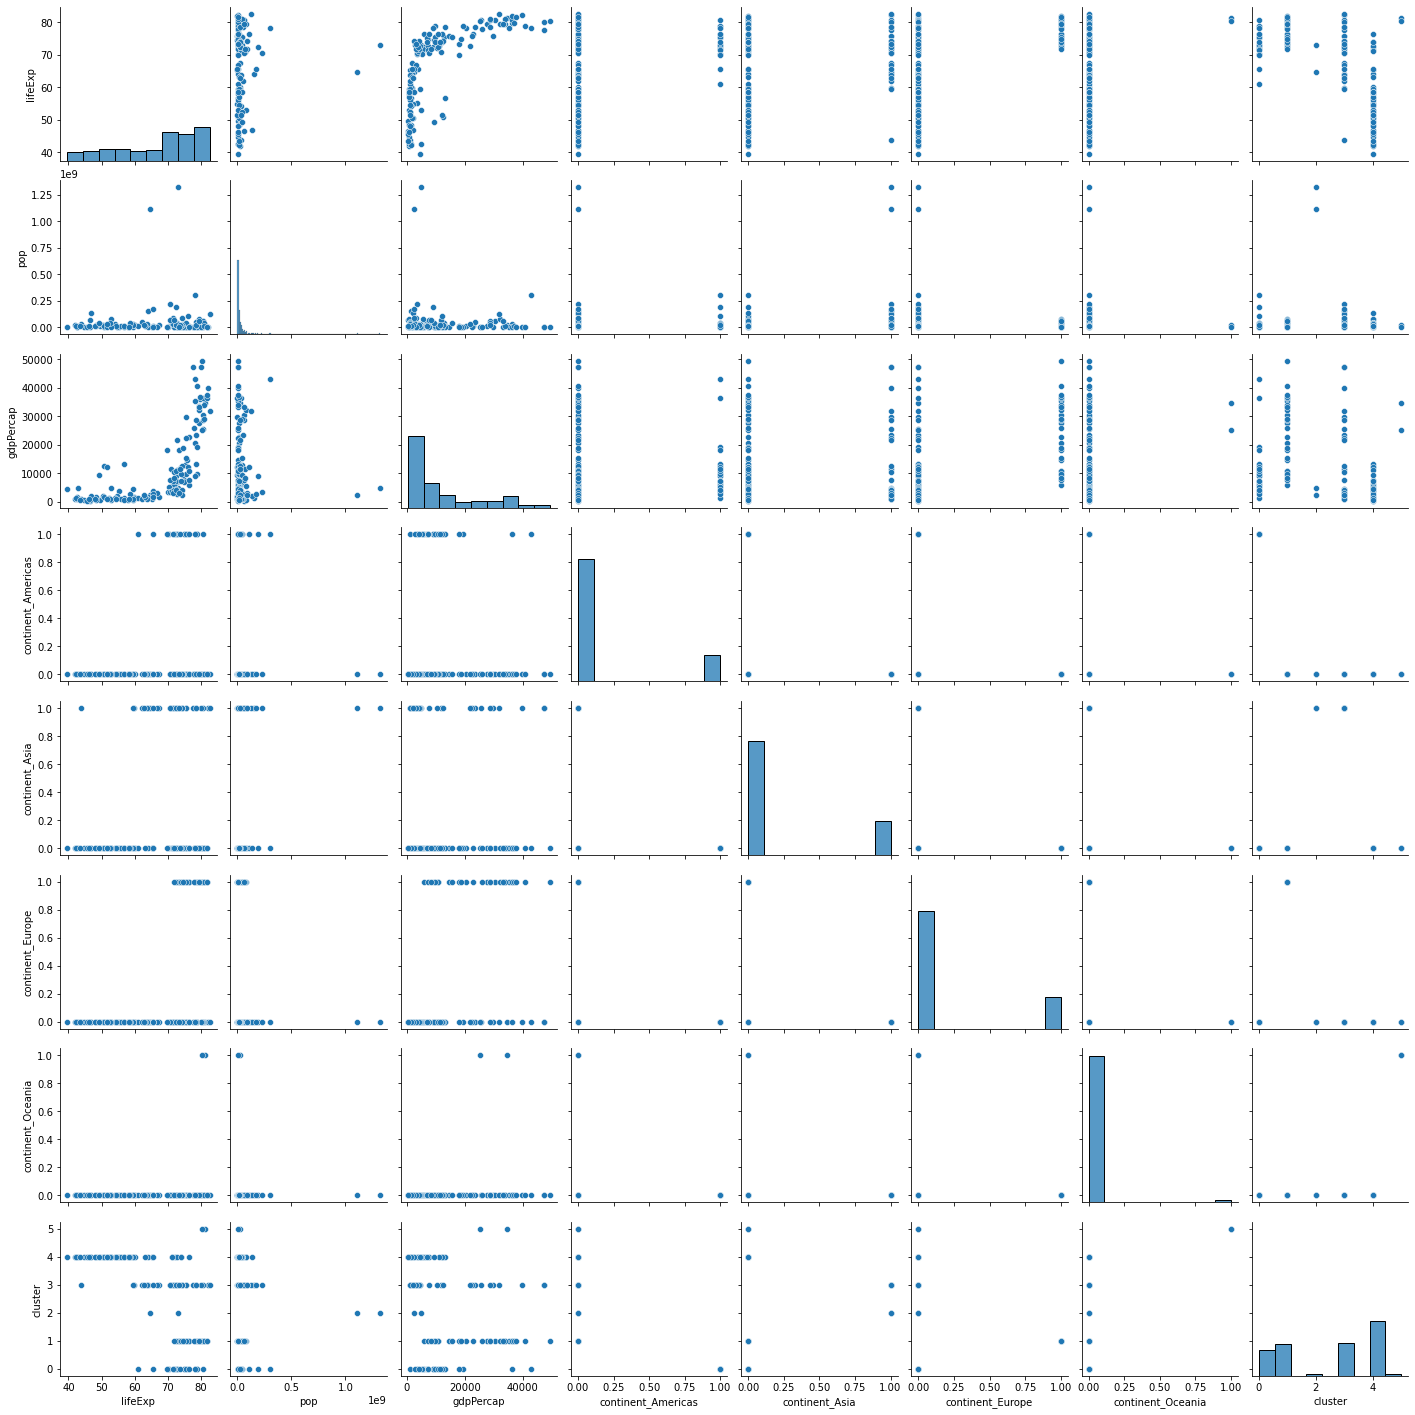

In [29]:
sns.pairplot(df);

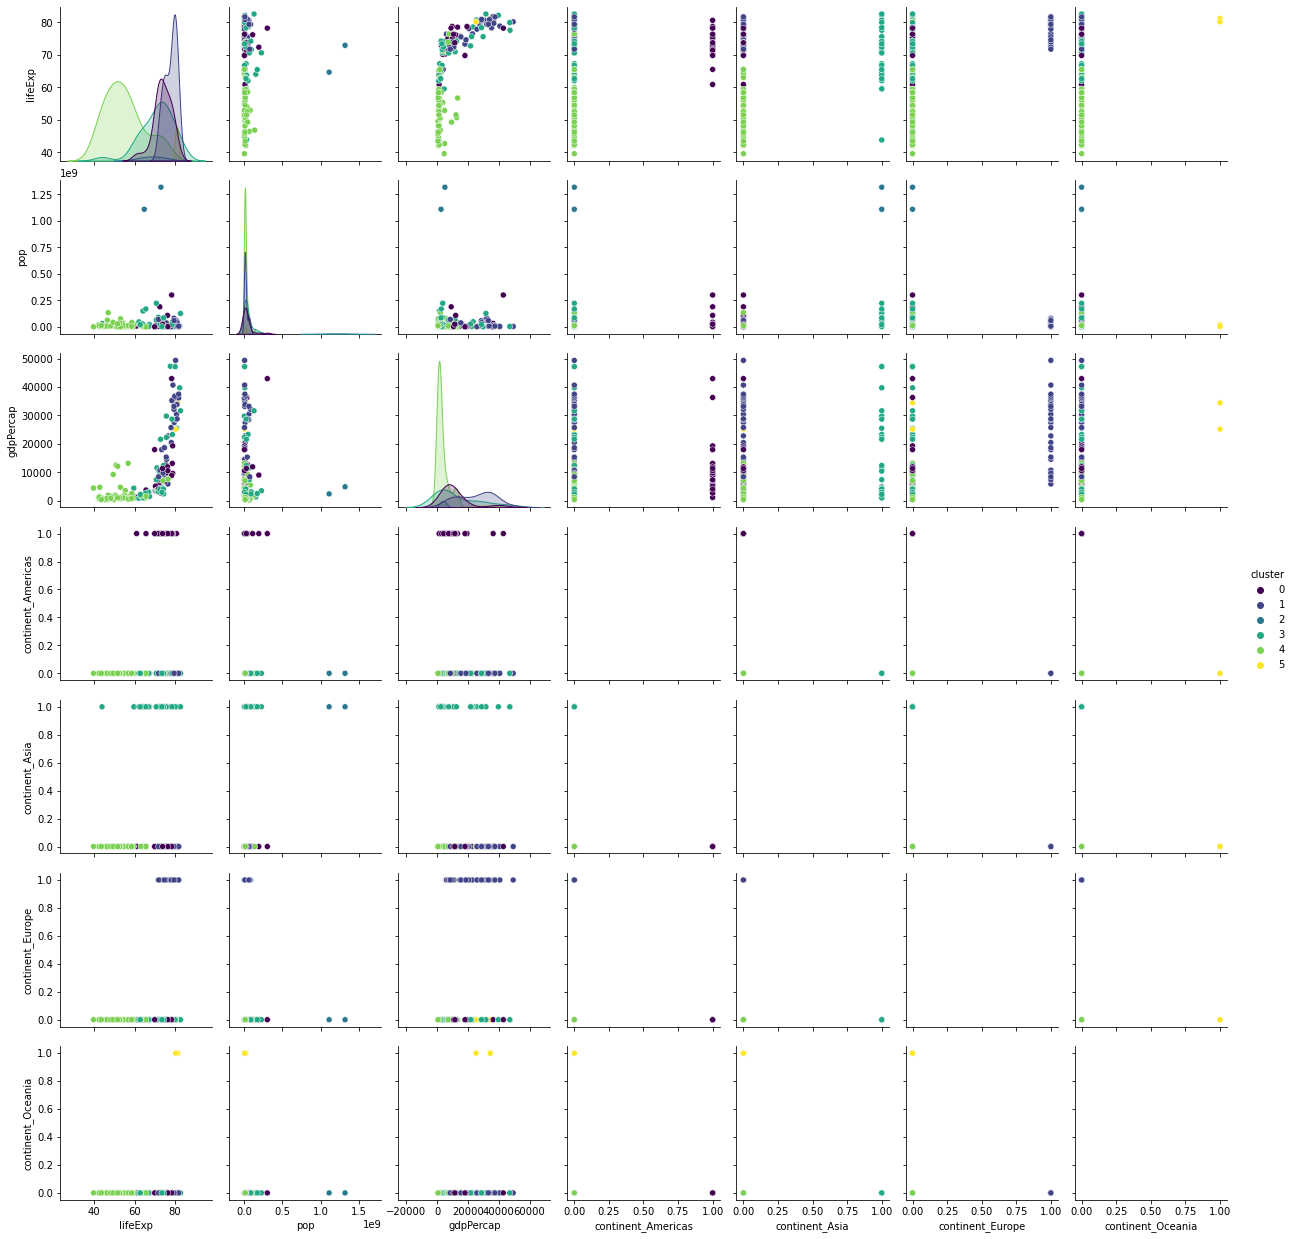

In [30]:
# Pairplot
sns.pairplot(df, hue="cluster", palette="viridis");

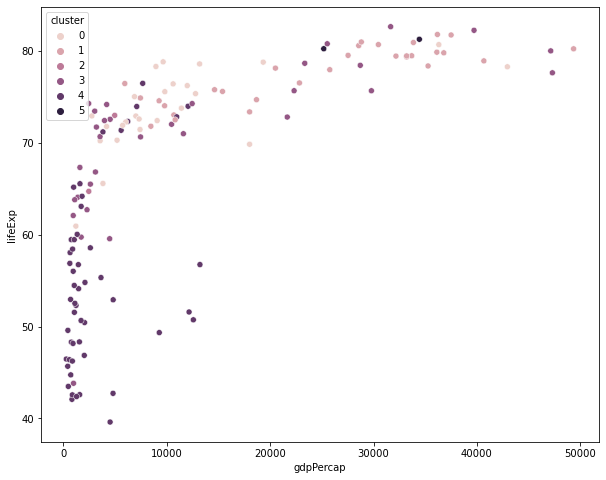

In [31]:
# Method 1: Pairplots/Scatterplots
# Create Scatterplot!

# Figsize
plt.figure(figsize=(10,8))

# Plot points
ax = sns.scatterplot(data = df, x="gdpPercap", y = "lifeExp", hue = "cluster");

# Plot Centroids
#centroids.plot(kind='scatter', x="gdpPercap", y="lifeExp", marker='*', s=500, ax=ax);


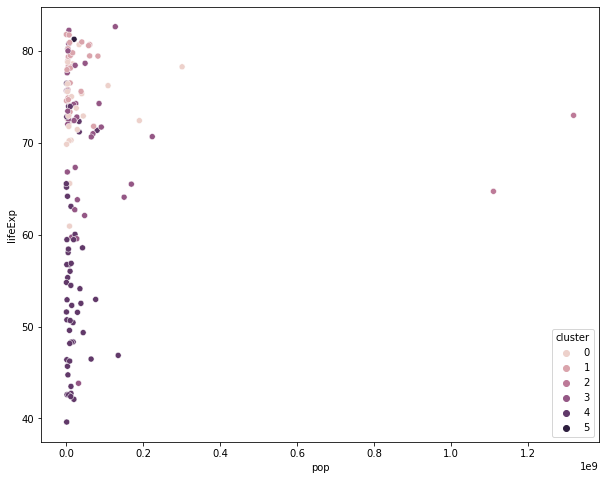

In [32]:
# Figsize
plt.figure(figsize=(10,8))

# Plot points
ax = sns.scatterplot(data = df, x="pop", y = "lifeExp", hue = "cluster");

# Plot Centroids
#centroids.plot(kind='scatter', x="gdpPercap", y="lifeExp", marker='*', s=500, ax=ax);

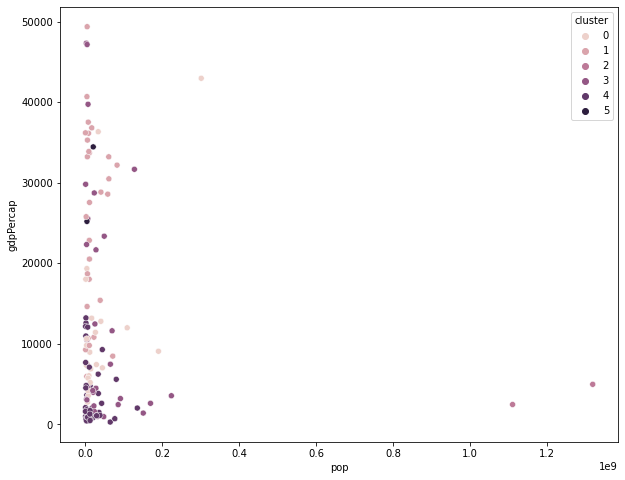

In [33]:
# Figsize
plt.figure(figsize=(10,8))

# Plot points
ax = sns.scatterplot(data = df, x="pop", y = "gdpPercap", hue = "cluster");

# Plot Centroids
#centroids.plot(kind='scatter', x="gdpPercap", y="lifeExp", marker='*', s=500, ax=ax);

In [34]:
# Method 2: Groupby
df.groupby("cluster")["lifeExp","pop","gdpPercap"].describe().T

cluster                       0              1                2  \
lifeExp   count        25.00000       30.00000          2.00000   
          mean         73.60812       77.64860         68.82950   
          std           4.44095        2.97981          5.84282   
          min          60.91600       71.77700         64.69800   
          25%          71.75200       75.02975         66.76375   
          50%          72.89900       78.60850         68.82950   
          75%          76.38400       79.81225         70.89525   
          max          80.65300       81.75700         72.96100   
pop       count        25.00000       30.00000          2.00000   
          mean   35954847.36000 19536617.63333 1214539713.50000   
          std    68833781.19155 23624743.65556  147280983.96291   
          min     1056608.00000   301931.00000 1110396331.00000   
          25%     5675356.00000  4780559.50000 1162468022.25000   
          50%     9319622.00000  9493598.00000 1214539713.50000   
          75%    28674757.00000 20849695.25000 1266611404.75000   
          max   301139947.00000 82400996.00000 1318683096.00000   
gdpPercap count        25.00000       30.00000          2.00000   
          mean      11003.03163    25054.48164       3705.66263   
          std        9713.20930    11800.33981       1772.64913   
          min        1201.63715     5937.02953       2452.21041   
          25%        5728.35351    14811.89821       3078.93652   
          50%        8948.10292    28054.06579       3705.66263   
          75%       11977.57496    33817.96253       4332.38874   
          max       42951.65309    49357.19017       4959.11485   

cluster                       3               4              5  
lifeExp   count        31.00000        52.00000        2.00000  
          mean         70.85100        54.80604       80.71950  
          std           8.13972         9.63078        0.72903  
          min          43.82800        39.61300       80.20400  
          25%          66.14300        47.83400       80.46175  
          50%          72.39600        52.92650       80.71950  
          75%          75.63750        59.44425       80.97725  
          max          82.60300        76.44200       81.23500  
pop       count        31.00000        52.00000        2.00000  
          mean   44608851.61290  17875763.30769 12274973.50000  
          std    55341736.22555  24917726.17182 11538854.83365  
          min      708573.00000    199579.00000  4115771.00000  
          25%     6239936.00000   2909226.50000  8195372.25000  
          50%    23301725.00000  10093310.50000 12274973.50000  
          75%    57056469.50000  19363654.50000 16354574.75000  
          max   223547000.00000 135031164.00000 20434176.00000  
gdpPercap count        31.00000        52.00000        2.00000  
          mean      13038.66327      3089.03260    29810.18827  
          std       14427.74887      3618.16349     6540.99110  
          min         944.00000       277.55186    25185.00911  
          25%        2523.76199       862.95154    27497.59869  
          50%        4471.06191      1452.26708    29810.18827  
          75%       22832.16630      3993.50158    32122.77786  
          max       47306.98978     13206.48452    34435.36744

#### An Even Closer Look...Which countries are in each of these clusters?

In [35]:
# For loop
for i in range(0,6):
    country = df[df["cluster"]==i].index
    print(f"Cluster {i+1}: {list(country)}")
    print("------------------------------------------------------")

Cluster 1: ['Argentina', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto Rico', 'Trinidad and Tobago', 'United States', 'Uruguay', 'Venezuela']
------------------------------------------------------
Cluster 2: ['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom']
------------------------------------------------------
Cluster 3: ['China', 'India']
------------------------------------------------------
Cluster 4: ['Afghanistan', 'Bahrain', 'Bangladesh', 'Cambodia', 'Hong Kong, China', 'Indonesia', 'I

In [36]:
df.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Australia',
       'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       ...
       'Uganda', 'United Kingdom', 'United States', 'Uruguay', 'Venezuela',
       'Vietnam', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=142)

### III. [In Groups] DBSCAN Clustering Model

- Try tuning your parameters
- Visualize your clusters
- Determine your best silhouette score
- Is this better or worse than KMeans?
- Which countries are in each cluster?

In [37]:
### Find "optimal" epsilon

epsilon_list = [0.5, 1.0, 1.5, 1.8, 1.9, 2.0, 2.1, 2.2, 2.5, 3.0, 3.5, 4.0]
score_list = []

for epi in epsilon_list:
    dbscan = DBSCAN(eps = epi, min_samples=2)
    dbscan.fit(X_sc)
    score_list.append(silhouette_score(X_sc, dbscan.labels_))
    
score_list

[0.4037518055318919,
 0.6205999229115197,
 0.6290040068572572,
 0.6314026029786388,
 0.6314026029786388,
 0.6350842772929556,
 0.6350842772929556,
 0.6350842772929556,
 0.35780521873057713,
 0.6624341676108216,
 0.6624341676108216,
 0.6624341676108216]

In [38]:
# The best silhouette score is at epsilon = 3.0

In [39]:
# The DBSCAN's silhouette score is better 
# than Kmeans of 0.6350842772929556

In [40]:
0.6624341676108216- 0.6350842772929556

# 0.02 or 2% better.

0.027349890317866055

In [41]:
dbscan = DBSCAN(eps = 3.0, min_samples=2)
dbscan.fit(X_sc)

DBSCAN(eps=3.0, min_samples=2)

In [42]:
# Create cluster column
df["cluster"] = dbscan.labels_

In [43]:
pd.Series(dbscan.labels_).value_counts()

0    138
1      2
2      2
dtype: int64

In [44]:
df[df["cluster"] == 0].mean()

lifeExp                    66.78229
pop                  27517273.94928
gdpPercap               11532.88766
continent_Americas          0.18116
continent_Asia              0.22464
continent_Europe            0.21739
continent_Oceania           0.00000
cluster                     0.00000
dtype: float64

In [45]:
df[df["cluster"] == 1]

,lifeExp,pop,gdpPercap,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,cluster
country,,,,,,,,
Australia,81.23500,20434176,34435.36744,0,0,0,1,1
New Zealand,80.20400,4115771,25185.00911,0,0,0,1,1


In [46]:
df[df["cluster"] == 2]

,lifeExp,pop,gdpPercap,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,cluster
country,,,,,,,,
China,72.96100,1318683096,4959.11485,0,1,0,0,2
India,64.69800,1110396331,2452.21041,0,1,0,0,2


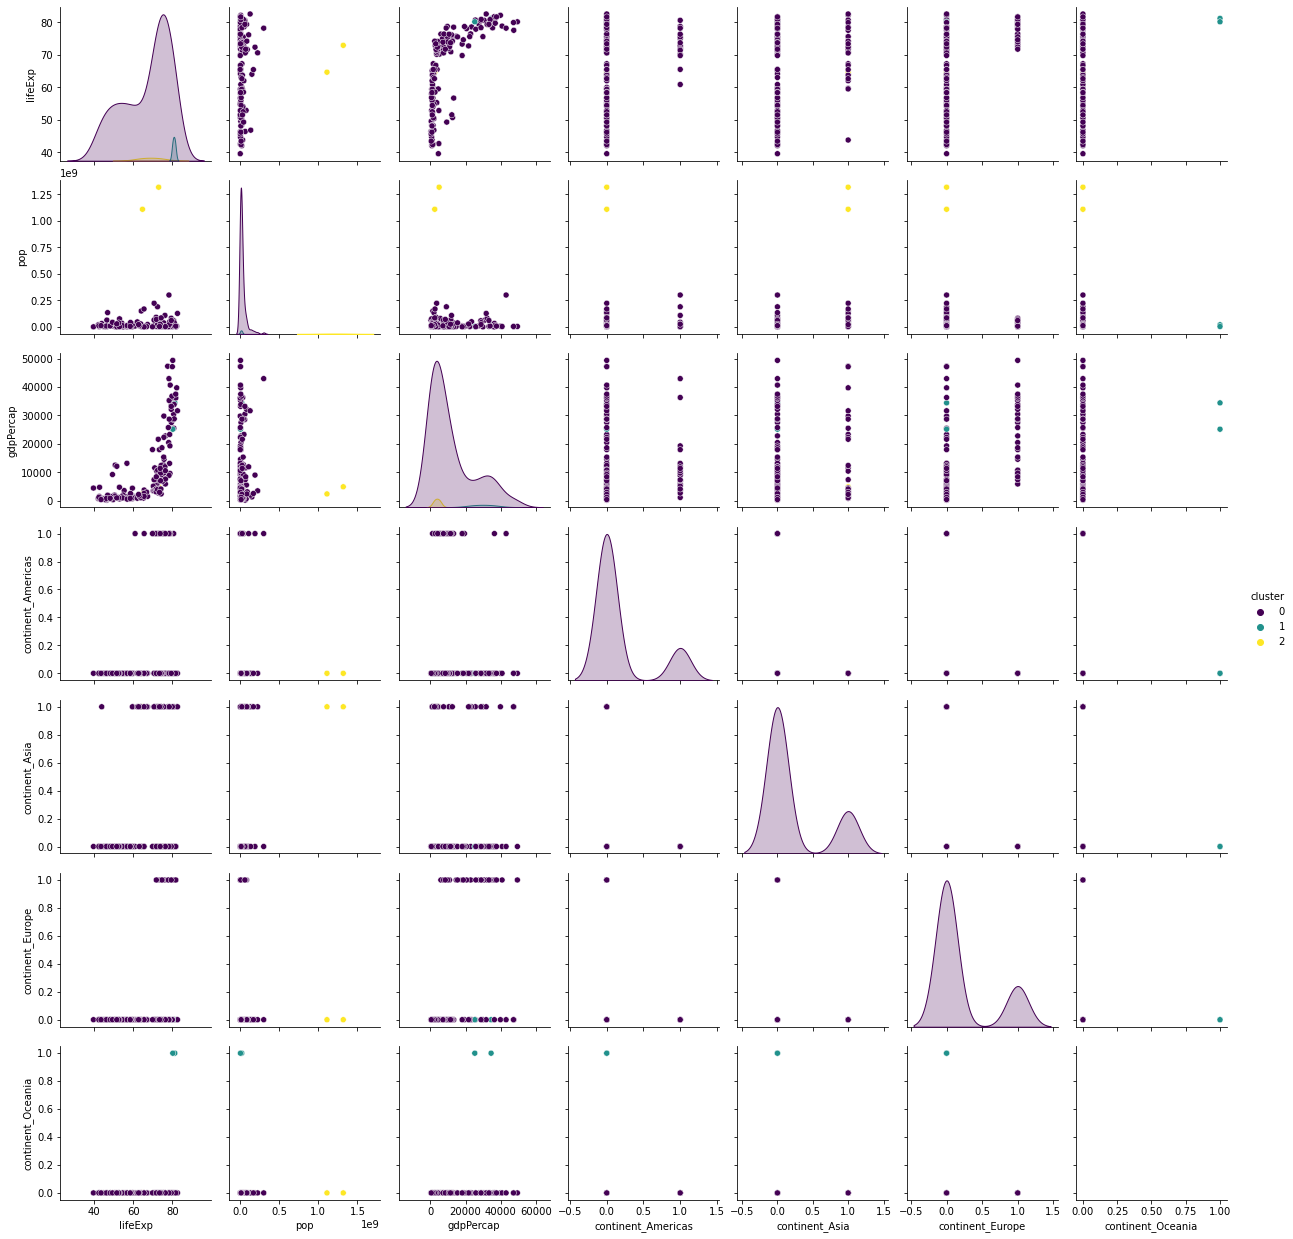

In [47]:
# Pairplot
sns.pairplot(df, hue="cluster", palette="viridis");

### ⭐ There are pros & cons for both DBSCAN and K-Means Clustering Models. Again, since this is unsupervised it is not easy to know which method you should use until you dive into your data! Keep exploring and diving into your data 💫 

In [48]:
# DBSCAN Clustering model result in 3 Clusters: 
# 1. Most Countries 2.Austrilia and New Zealand 3.China and India

# Cluster 2: Austrilia and New Zealand have 
# significantly higher life expectancy and high GDP per capita.
# Moreover, both countries are on Oceania continent.

# Cluster 3: China and India have 
# significantly higher number of population and low GDP per capita.
# Moreover, both countries are on Asia continent.

In [49]:
df.head()

,lifeExp,pop,gdpPercap,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,cluster
country,,,,,,,,
Afghanistan,43.82800,31889923,974.58034,0,1,0,0,0
Albania,76.42300,3600523,5937.02953,0,0,1,0,0
Algeria,72.30100,33333216,6223.36747,0,0,0,0,0
Angola,42.73100,12420476,4797.23127,0,0,0,0,0
Argentina,75.32000,40301927,12779.37964,1,0,0,0,0


In [50]:
# Define X without continent
X = df[["lifeExp","pop","gdpPercap"]]

In [51]:
X.head()

,lifeExp,pop,gdpPercap
country,,,
Afghanistan,43.82800,31889923,974.58034
Albania,76.42300,3600523,5937.02953
Algeria,72.30100,33333216,6223.36747
Angola,42.73100,12420476,4797.23127
Argentina,75.32000,40301927,12779.37964


In [52]:
# Scale Features
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [53]:
### Find "optimal" epsilon

epsilon_list = [0.5, 1.0, 1.5, 1.8]
score_list = []

for epi in epsilon_list:
    dbscan = DBSCAN(eps = epi, min_samples=2)
    dbscan.fit(X_sc)
    score_list.append(silhouette_score(X_sc, dbscan.labels_))
    
score_list

[-0.17184619910212198,
 0.7242892019472204,
 0.7242892019472204,
 0.7858459160375665]

In [54]:
dbscan = DBSCAN(eps = 1.8, min_samples=2)
dbscan.fit(X_sc)

DBSCAN(eps=1.8, min_samples=2)

In [55]:
# Create cluster column
df["cluster"] = dbscan.labels_

In [56]:
pd.Series(dbscan.labels_).value_counts()

0    140
1      2
dtype: int64

In [57]:
df[df["cluster"] == 0].mean()

lifeExp                    66.98139
pop                  27299526.80000
gdpPercap               11793.99195
continent_Americas          0.17857
continent_Asia              0.22143
continent_Europe            0.21429
continent_Oceania           0.01429
cluster                     0.00000
dtype: float64

In [58]:
df[df["cluster"] == 1]

,lifeExp,pop,gdpPercap,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,cluster
country,,,,,,,,
China,72.96100,1318683096,4959.11485,0,1,0,0,1
India,64.69800,1110396331,2452.21041,0,1,0,0,1
